# Analisis del set datos de: *Movies on Netflix, Prime Video, Hulu and Disney+*

# Tarea 1
    Alumno: Santiago López Rojas
    Curso: Reconocimiento de patrones

In [1]:
#Se inicia por importar las bibliotecas necesarias para manejo de datos (como pandas, numpy y statistics)
#y se importan bibliotecas para imprimir resultados en pantalla (como matplotlib)

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from statistics import mean, median
import seaborn as sns

%matplotlib inline

## Lectura y procesado de datos

Data extraída de: https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney
La idea de esta sección es modificar el set de datos original para:

1. Solo posea valores numéricos y binarios
2. Tenga una forma muy simple y fácil de graficar

In [2]:
#Se importa la data de las peliculas en el data frame denominado "data"
data = pd.read_csv("MoviesOnStreamingPlatforms_updated.csv")
data = pd.DataFrame(data)

In [3]:
#Se imprimen las primeras 5 filas para ver las columnas que posee el set de datos
print("El set de datos posee una extension de", len(data), "filas")
data.head()

El set de datos posee una extension de 16744 filas


,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


Se tienen 16 columnas las cuales indican:

1. Calificaciones que han tenido las respectivas peliculas (IMDb y Rotten Tomatoes)
2. El servicio de streaming que probee las peliculas (Netflix, Hulu, Prime Video y Disney+)
3. Características de la pelicula (Genres, Language, Runtime, Age, runtime y Title)
4. Características sobre la creación de la pelicula (Year, Directors y Country)


In [4]:
#La columna Unnamed: 0 y Type no son usadas y por ende se eliminan del data set
data = data.drop(['Unnamed: 0','Type'], axis=1)
data.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


La idea de este analisis es ver si hay una relación entre las características de las peliculas y la distribuidora de Streaming que las probee. Teniendo esto en cuenta, **se decide eliminar el nombre de la película y el nombre del director de la misma.**

In [5]:
#La columna Unnamed: 0 y Type no son usadas y por ende se eliminan del data set
data = data.drop(['Title','ID','Directors'], axis=1)
data.head()

,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Genres,Country,Language,Runtime
0,2010,13+,8.8,87%,1,0,0,0,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1999,18+,8.7,87%,1,0,0,0,"Action,Sci-Fi",United States,English,136.0
2,2018,13+,8.5,84%,1,0,0,0,"Action,Adventure,Sci-Fi",United States,English,149.0
3,1985,7+,8.5,96%,1,0,0,0,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,1966,18+,8.8,97%,1,0,1,0,Western,"Italy,Spain,West Germany",Italian,161.0


In [6]:
def only_num(txt):
    if txt is np.nan:
        return 0
    elif txt == 'all':
        return 3
    else:
        return "".join(c for c in txt if c.isdigit())

#Se eliminan los caracteres de + y % ya que dificulta el plot
data['Age']             = data['Age'].map(only_num)
data['Rotten Tomatoes'] = data['Rotten Tomatoes'].map(only_num)
data['Rotten Tomatoes'] = data['Rotten Tomatoes'].astype(int)
data['Age']             = data['Age'].astype(int)
data.head()

,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Genres,Country,Language,Runtime
0,2010,13,8.8,87,1,0,0,0,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1999,18,8.7,87,1,0,0,0,"Action,Sci-Fi",United States,English,136.0
2,2018,13,8.5,84,1,0,0,0,"Action,Adventure,Sci-Fi",United States,English,149.0
3,1985,7,8.5,96,1,0,0,0,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,1966,18,8.8,97,1,0,1,0,Western,"Italy,Spain,West Germany",Italian,161.0


In [7]:
#Ahora está el problema de que existen multiples variables por columna en 
#diferentes características de las peliculas, como por ejemplo el genero, el
#lenguaje y país donde se hacen las grabaciones. Se crea una función para 
#dividir la columna en multiples columnas con un código binario asociado.

def split_Columns(Column, Name, data):
    #Se crea un DataFrame con una unica columna
    NewData      = pd.DataFrame(Column)
    
    #Se pasa a una lista de listas quitando las comas
    NewData_list = NewData[Name].str.split(",").tolist()
    
    #Se elimina los nan y se remplaza con una lista vacia
    NewData_list_fix = [[] if str(x) == 'nan' else x for x in NewData_list]
    
    #Se transforma en un DataFrame de extención desconocida ya sin nan values
    #pero no se sabe la cantidad máxima de columnas que tiene el DataFrame
    NewData_df       = pd.DataFrame(NewData_list_fix)
    
    #Se crea una lista, con la cantidad de columnas del DataFrame resultante
    #de este modo no importa la cantidad de columnas se trabaja de forma general
    Columns_Originales = NewData_df.columns
    
    #Lista temporal
    List_Var = []
    
    #Se obtienen los valores unicos de cada una de las columnas genradas, pero esta
    #lista posee valores repetidos (puede poseer)
    for n in Columns_Originales:
        List_Var = List_Var + list(NewData_df[n].unique())

    #Se crea un diccionario para eliminar los valores repetidos de la lista creada
    #anteriormente
    diccionario = {}
    List_Var    = list(filter(None, List_Var)) #Se elimina el nan la lista
    contador    = 1

    for word in List_Var:
        if not word in diccionario:
            #Se le da al value y el key el mismo valor, aunque realmente no 
            #importa que value posea
            diccionario[word] = word
            contador += 1
            
            #Para aprovechar el ciclo, se agregan nuevas columnas al DF con
            #los nombres unicos y no repetidos del diccionario
            NewData_df[word]  = 0
    
    #Se binarisa los valores de las columnas
    for i in list(diccionario.keys()):
        for m in Columns_Originales:
            NewData_df.loc[NewData_df[m] == i, i] = 1
        
        #Se actualiza el DataFrame original con las columnas binarias resulatantes
        data[i] = NewData_df[i]
    
    #Se elimina la columna fuente del DF original, ya que la información de esta 
    #ahora esta en las columnas binarias "hijas"
    data = data.drop([Name], axis=1)
    
    #Se regresa el DF original y el contador y la lista de columnas generadas
    return  data, contador, list(diccionario.keys())


In [8]:
#Se prueba la función con la variable 'Generos'
data, contador, Columns_Genres= split_Columns(data["Genres"], "Genres", data)

#Se imprime todos los generos individuales que existe en el data set
#como resultado se tiene 28 diferentes generos
print('Número de generos:', contador)

#Se ve que genero posee cual pelicula
pd.set_option('display.max_columns', None)
data.head()

Número de generos: 28


,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Country,Language,Runtime,Action,Adventure,Western,Animation,Biography,Drama,Crime,Comedy,Documentary,Family,Horror,Thriller,Mystery,Fantasy,Romance,Short,Sci-Fi,Talk-Show,Sport,Reality-TV,Musical,Music,War,News,History,Game-Show,Film-Noir
0,2010,13,8.8,87,1,0,0,0,"United States,United Kingdom","English,Japanese,French",148.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1999,18,8.7,87,1,0,0,0,United States,English,136.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2018,13,8.5,84,1,0,0,0,United States,English,149.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1985,7,8.5,96,1,0,0,0,United States,English,116.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1966,18,8.8,97,1,0,1,0,"Italy,Spain,West Germany",Italian,161.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
#Este proceso se repite para la variable "Country" y "Language"
#Importante destacar que la lista de columnas Columns_Country se usara mas adelante, al igual que Columns_Language y Columns_Genres
data, contador, Columns_Country = split_Columns(data["Country"], "Country", data)

#En este analisis en particular se obtienen grabaciones en 169 paises
print('País de grabación:', contador)

#Se ve que pais se graba cada pelicula
pd.set_option('display.max_columns', None)
data.head()

País de grabación: 169


,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Language,Runtime,Action,Adventure,Western,Animation,Biography,Drama,Crime,Comedy,Documentary,Family,Horror,Thriller,Mystery,Fantasy,Romance,Short,Sci-Fi,Talk-Show,Sport,Reality-TV,Musical,Music,War,News,History,Game-Show,Film-Noir,United States,Italy,United Kingdom,Germany,India,Mexico,Ireland,South Africa,South Korea,Spain,Hong Kong,France,Japan,Sweden,China,Canada,Austria,Thailand,Switzerland,Australia,Hungary,Indonesia,Argentina,Romania,Brazil,Uruguay,Finland,Saudi Arabia,Norway,Cambodia,Taiwan,Israel,Belgium,Philippines,Georgia,Chile,Russia,Pakistan,Netherlands,Denmark,Iraq,Turkey,Qatar,Ghana,New Zealand,United Arab Emirates,Jamaica,Bulgaria,Poland,Slovenia,Iceland,Portugal,Singapore,Greece,Peru,Egypt,West Germany,Malaysia,Croatia,Nigeria,Lebanon,Kenya,Czech Republic,Colombia,Paraguay,Soviet Union,Bangladesh,Korea,Serbia,Kuwait,Republic of North Macedonia,Iran,Cuba,Venezuela,Malta,Nepal,Albania,Ukraine,Afghanistan,Bosnia and Herzegovina,Syria,Slovakia,Belarus,Bahamas,Papua New Guinea,Czechoslovakia,Rwanda,Luxembourg,Palestine,Kyrgyzstan,Puerto Rico,Yugoslavia,Cyprus,Latvia,Kazakhstan,Sri Lanka,Vietnam,Algeria,Somalia,Estonia,Guatemala,Lithuania,Dominican Republic,Isle Of Man,Mongolia,U.S. Virgin Islands,Guam,Mozambique,Morocco,Cameroon,Aruba,Tajikistan,Zambia,Azerbaijan,Trinidad and Tobago,Ecuador,Armenia,Malawi,Mali,Côte d'Ivoire,Tunisia,Burundi,Congo,Tanzania,East Germany,Jordan,Libya,Namibia,Holy See (Vatican City State),Senegal,Bermuda,Bolivia,Monaco,Uganda,Bahrain,Djibouti,Serbia and Montenegro,Ethiopia,Montenegro,Kosovo,Haiti,Panama,Burkina Faso,Nicaragua,Liberia,Tonga,Angola,Cayman Islands,Federal Republic of Yugoslavia,Chad,Sudan,Zimbabwe,Honduras,Liechtenstein,Equatorial Guinea,Reunion,Vanuatu,Sierra Leone,Botswana,Swaziland,Costa Rica,El Salvador,Macao,The Democratic Republic Of Congo,Moldova,Oman,Yemen,Laos
0,2010,13,8.8,87,1,0,0,0,"English,Japanese,French",148.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1999,18,8.7,87,1,0,0,0,English,136.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2018,13,8.5,84,1,0,0,0,English,149.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1985,7,8.5,96,1,0,0,0,English,116.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1966,18,8.8,97,1,0,1,0,Italian,161.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [10]:
data, contador, Columns_Language = split_Columns(data["Language"], "Language", data)

#Se tienen 179 idiomas en total
print('Idiomas:', contador)

#Se ve que Idiomas tiene cada pelicula
pd.set_option('display.max_columns', None)
data.head()

Idiomas: 179


,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Runtime,Action,Adventure,Western,Animation,Biography,Drama,Crime,Comedy,Documentary,Family,Horror,Thriller,Mystery,Fantasy,Romance,Short,Sci-Fi,Talk-Show,Sport,Reality-TV,Musical,Music,War,News,History,Game-Show,Film-Noir,United States,Italy,United Kingdom,Germany,India,Mexico,Ireland,South Africa,South Korea,Spain,Hong Kong,France,Japan,Sweden,China,Canada,Austria,Thailand,Switzerland,Australia,Hungary,Indonesia,Argentina,Romania,Brazil,Uruguay,Finland,Saudi Arabia,Norway,Cambodia,Taiwan,Israel,Belgium,Philippines,Georgia,Chile,Russia,Pakistan,Netherlands,Denmark,Iraq,Turkey,Qatar,Ghana,New Zealand,United Arab Emirates,Jamaica,Bulgaria,Poland,Slovenia,Iceland,Portugal,Singapore,Greece,Peru,Egypt,West Germany,Malaysia,Croatia,Nigeria,Lebanon,Kenya,Czech Republic,Colombia,Paraguay,Soviet Union,Bangladesh,Korea,Serbia,Kuwait,Republic of North Macedonia,Iran,Cuba,Venezuela,Malta,Nepal,Albania,Ukraine,Afghanistan,Bosnia and Herzegovina,Syria,Slovakia,Belarus,Bahamas,Papua New Guinea,Czechoslovakia,Rwanda,Luxembourg,Palestine,Kyrgyzstan,Puerto Rico,Yugoslavia,Cyprus,Latvia,Kazakhstan,Sri Lanka,Vietnam,Algeria,Somalia,Estonia,Guatemala,Lithuania,Dominican Republic,Isle Of Man,Mongolia,U.S. Virgin Islands,Guam,Mozambique,Morocco,Cameroon,Aruba,Tajikistan,Zambia,Azerbaijan,Trinidad and Tobago,Ecuador,Armenia,Malawi,Mali,Côte d'Ivoire,Tunisia,Burundi,Congo,Tanzania,East Germany,Jordan,Libya,Namibia,Holy See (Vatican City State),Senegal,Bermuda,Bolivia,Monaco,Uganda,Bahrain,Djibouti,Serbia and Montenegro,Ethiopia,Montenegro,Kosovo,Haiti,Panama,Burkina Faso,Nicaragua,Liberia,Tonga,Angola,Cayman Islands,Federal Republic of Yugoslavia,Chad,Sudan,Zimbabwe,Honduras,Liechtenstein,Equatorial Guinea,Reunion,Vanuatu,Sierra Leone,Botswana,Swaziland,Costa Rica,El Salvador,Macao,The Democratic Republic Of Congo,Moldova,Oman,Yemen,Laos,English,Italian,Hindi,Spanish,Korean,Cantonese,Japanese,French,Telugu,Thai,East-Greenlandic,Swedish,Filipino,Arabic,Ukrainian,Hungarian,Marathi,Persian,Norwegian,Indonesian,Romanian,Portuguese,Vietnamese,Khmer,Mandarin,Georgian,Russian,Urdu,Basque,Tamil,Danish,Turkish,Akan,German,Yiddish,Wolof,Hebrew,Flemish,Slovenian,Dutch,Punjabi,Icelandic,American Sign Language,Malayalam,Bengali,Tagalog,Polish,Kannada,Finnish,Gujarati,Malay,Croatian,Nepali,Chinese,Catalan,Zulu,Yoruba,Afrikaans,Sanskrit,Sinhalese,Assamese,Kurdish,None,Maya,Estonian,Czech,Swiss German,Aboriginal,Serbian,Bulgarian,Xhosa,Sicilian,Lingala,Haitian,Greek,Kinyarwanda,Min Nan,Mongolian,Aramaic,Kirghiz,Bosnian,Maori,Latvian,Latin,Bhojpuri,Dari,Albanian,Slovak,Macedonian,Swahili,Tajik,Azerbaijani,Esperanto,Serbo-Croatian,Hawaiian,Brazilian Sign Language,Nyanja,Saami,Japanese Sign Language,Irish,Cheyenne,Polynesian,Quechua,Turkmen,Pushto,Amharic,Kriolu,Awadhi,Armenian,Mohawk,Mixtec,Minangkabau,Tarahumara,Greenlandic,Ibo,Hausa,Klingon,Navajo,Australian Sign Language,Sign Languages,Welsh,Middle English,Cornish,Haryanvi,Inuktitut,Guarani,Hakka,Gallegan,Scots,Ewe,Tibetan,Assyrian Neo-Aramaic,Sioux,Southern Sotho,Creek,Shanghainese,Low German,Athapascan languages,Micmac,Apache languages,Tatar,Lao,Kazakh,Somali,Lithuanian,Romany,Masai,North American Indian,Dyula,Rajasthani,More,Uighur,British Sign Language,Nushi,Algonquin,Scottish Gaelic,Manipuri,Aragonese,Chechen,Teochew,Spanish Sign Language,Papiamento,Tupi,French Sign Language,Belarusian,Kabyle,Occitan,Fulah,Acholi,Hokkien,Nama,Mapudungun,Bemba,Maltese,Luxembourgish,Kudmali,Berber languages,Ancient (to 1453)
0,2010,13,8.8,87,1,0,0,0,148.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0

In [11]:
#Finalmente se deben de eliminar los nans en las columnas antiguas
data = data.fillna(0)

Con esto se finaliza la manipulación del set de datos, ahora todas las columnas poseen valores númericos o binarios. Ahora se procede a dividir el DataFrame original "data" en 4 diferentes, uno para servicio de streaming

In [12]:
Netflix = data.loc[data["Netflix"]     == 1]
Hulu    = data.loc[data["Hulu"]        == 1]
Prime   = data.loc[data["Prime Video"] == 1]
Disney  = data.loc[data["Disney+"]     == 1]

In [13]:
#Entonces por ejemplo podemos imprimir el head del nuevo DF de Netflix
#Como se ve la columna Netflix solo posee 1 pero sus competidoras en ocaciones tambien comparten el servicio de esa pelicula
Netflix.head()

,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Runtime,Action,Adventure,Western,Animation,Biography,Drama,Crime,Comedy,Documentary,Family,Horror,Thriller,Mystery,Fantasy,Romance,Short,Sci-Fi,Talk-Show,Sport,Reality-TV,Musical,Music,War,News,History,Game-Show,Film-Noir,United States,Italy,United Kingdom,Germany,India,Mexico,Ireland,South Africa,South Korea,Spain,Hong Kong,France,Japan,Sweden,China,Canada,Austria,Thailand,Switzerland,Australia,Hungary,Indonesia,Argentina,Romania,Brazil,Uruguay,Finland,Saudi Arabia,Norway,Cambodia,Taiwan,Israel,Belgium,Philippines,Georgia,Chile,Russia,Pakistan,Netherlands,Denmark,Iraq,Turkey,Qatar,Ghana,New Zealand,United Arab Emirates,Jamaica,Bulgaria,Poland,Slovenia,Iceland,Portugal,Singapore,Greece,Peru,Egypt,West Germany,Malaysia,Croatia,Nigeria,Lebanon,Kenya,Czech Republic,Colombia,Paraguay,Soviet Union,Bangladesh,Korea,Serbia,Kuwait,Republic of North Macedonia,Iran,Cuba,Venezuela,Malta,Nepal,Albania,Ukraine,Afghanistan,Bosnia and Herzegovina,Syria,Slovakia,Belarus,Bahamas,Papua New Guinea,Czechoslovakia,Rwanda,Luxembourg,Palestine,Kyrgyzstan,Puerto Rico,Yugoslavia,Cyprus,Latvia,Kazakhstan,Sri Lanka,Vietnam,Algeria,Somalia,Estonia,Guatemala,Lithuania,Dominican Republic,Isle Of Man,Mongolia,U.S. Virgin Islands,Guam,Mozambique,Morocco,Cameroon,Aruba,Tajikistan,Zambia,Azerbaijan,Trinidad and Tobago,Ecuador,Armenia,Malawi,Mali,Côte d'Ivoire,Tunisia,Burundi,Congo,Tanzania,East Germany,Jordan,Libya,Namibia,Holy See (Vatican City State),Senegal,Bermuda,Bolivia,Monaco,Uganda,Bahrain,Djibouti,Serbia and Montenegro,Ethiopia,Montenegro,Kosovo,Haiti,Panama,Burkina Faso,Nicaragua,Liberia,Tonga,Angola,Cayman Islands,Federal Republic of Yugoslavia,Chad,Sudan,Zimbabwe,Honduras,Liechtenstein,Equatorial Guinea,Reunion,Vanuatu,Sierra Leone,Botswana,Swaziland,Costa Rica,El Salvador,Macao,The Democratic Republic Of Congo,Moldova,Oman,Yemen,Laos,English,Italian,Hindi,Spanish,Korean,Cantonese,Japanese,French,Telugu,Thai,East-Greenlandic,Swedish,Filipino,Arabic,Ukrainian,Hungarian,Marathi,Persian,Norwegian,Indonesian,Romanian,Portuguese,Vietnamese,Khmer,Mandarin,Georgian,Russian,Urdu,Basque,Tamil,Danish,Turkish,Akan,German,Yiddish,Wolof,Hebrew,Flemish,Slovenian,Dutch,Punjabi,Icelandic,American Sign Language,Malayalam,Bengali,Tagalog,Polish,Kannada,Finnish,Gujarati,Malay,Croatian,Nepali,Chinese,Catalan,Zulu,Yoruba,Afrikaans,Sanskrit,Sinhalese,Assamese,Kurdish,None,Maya,Estonian,Czech,Swiss German,Aboriginal,Serbian,Bulgarian,Xhosa,Sicilian,Lingala,Haitian,Greek,Kinyarwanda,Min Nan,Mongolian,Aramaic,Kirghiz,Bosnian,Maori,Latvian,Latin,Bhojpuri,Dari,Albanian,Slovak,Macedonian,Swahili,Tajik,Azerbaijani,Esperanto,Serbo-Croatian,Hawaiian,Brazilian Sign Language,Nyanja,Saami,Japanese Sign Language,Irish,Cheyenne,Polynesian,Quechua,Turkmen,Pushto,Amharic,Kriolu,Awadhi,Armenian,Mohawk,Mixtec,Minangkabau,Tarahumara,Greenlandic,Ibo,Hausa,Klingon,Navajo,Australian Sign Language,Sign Languages,Welsh,Middle English,Cornish,Haryanvi,Inuktitut,Guarani,Hakka,Gallegan,Scots,Ewe,Tibetan,Assyrian Neo-Aramaic,Sioux,Southern Sotho,Creek,Shanghainese,Low German,Athapascan languages,Micmac,Apache languages,Tatar,Lao,Kazakh,Somali,Lithuanian,Romany,Masai,North American Indian,Dyula,Rajasthani,More,Uighur,British Sign Language,Nushi,Algonquin,Scottish Gaelic,Manipuri,Aragonese,Chechen,Teochew,Spanish Sign Language,Papiamento,Tupi,French Sign Language,Belarusian,Kabyle,Occitan,Fulah,Acholi,Hokkien,Nama,Mapudungun,Bemba,Maltese,Luxembourgish,Kudmali,Berber languages,Ancient (to 1453)
0,2010,13,8.8,87,1,0,0,0,148.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0

## Prueba de sustitución de valores ausentes

Anteriormente se colocó a 0 todos los valores NAN, pero ¿Es esta la mejor práctica? ¿Qué otras opciones existen?

A continuación se van a usar dos aproximaciones para rellenar valores faltantes:
* Uso de la media
* Uso de la mediana

In [14]:
#Primero se importa de statistics las funciones de media y mediana
from statistics import mean, median
import random

#Se crea un set de datos experimental llamado "Test", en el que se van a 
#agregar los datos que cumplan con las siguientes condiciones:
#
# 1- Tengan un valor de Rotten Tomatoes diferente a 0 (para no considerar NAN values)
# 2- Sean distribuidas por Prime Videos
# 3- Sean peliculas de acción 
# 4- Sean en Ingles
#
# Devido a que las peliculas poseen varias categorias o idiomas estas
# condiciones no son excluyentes, si la pelicula es de terror y accion 
# califica o si es en ingles y frances tambien califica para el experimento

Test = data.loc[data["Prime Video"] == 1, ['Rotten Tomatoes','Action','Prime Video','English']]
print("Prime videos posee", len(Test) , "películas")
Test = Test.loc[data["Action"]      == 1]
print(len(Test) , "películas son de acción")
Test = Test.loc[data["English"]     == 1]
print(len(Test) , "películas están, además, en inglés")
Test = Test.loc[data["Rotten Tomatoes"] > 0]
print(len(Test) , " de estas poseen calificación en Rotten Tomatoes")
print()

#Con este set de datos se harán las pruebas de concepto
Test = Test.reset_index(drop=True)
Test.head()


Prime videos posee 12354 películas
2049 películas son de acción
1523 películas están, además, en inglés
290  de estas poseen calificación en Rotten Tomatoes



,Rotten Tomatoes,Action,Prime Video,English
0,72,1,1,1
1,100,1,1,1
2,52,1,1,1
3,38,1,1,1
4,40,1,1,1


## Primera Prueba

In [15]:
#Ahora que ya se tiene aislado el set de datos de test, se va a volver np.nan
#valores de Rotten Tomatoes de diferentes lineas (esta seleccion es de manera
#aleatoria)


index    = []
Test_mod = pd.DataFrame()

#Se copia el valor de la columna RT en un nuevo DF
Test_mod['Rotten Tomatoes'] = Test['Rotten Tomatoes'].copy()

#Se generan 29 números aleatorios en el rango del DF Test (siendo el 10% de los valores)
for n in range(29):
    x        = len(Test)+ 10
    while(x not in index):
        x = random.randint(0,len(Test)-1)
        if x not in index:
            index.append(x)

#Se eliminan los valores de la lista de muestras aleatorias index
Test_mod['Rotten Tomatoes'][index] = np.nan

#Se copian las demas columnas
Test_mod['Action']      = Test['Action']
Test_mod['Prime Video'] = Test['Prime Video']
Test_mod['English']     = Test['English']

print("Se eliminan los valores de las muestras", index)
print()
Test_mod.head()

Se eliminan los valores de las muestras [56, 259, 70, 181, 197, 63, 82, 281, 68, 117, 230, 74, 86, 122, 282, 39, 177, 183, 253, 99, 161, 113, 7, 238, 49, 135]



,Rotten Tomatoes,Action,Prime Video,English
0,72.0,1,1,1
1,100.0,1,1,1
2,52.0,1,1,1
3,38.0,1,1,1
4,40.0,1,1,1


In [16]:
#Se calcula la media y la mediana de la columna Rotten Tomatoes
mn = mean(Test_mod['Rotten Tomatoes'][~pd.isnull(Test_mod['Rotten Tomatoes'])])
md = median(Test_mod['Rotten Tomatoes'][~pd.isnull(Test_mod['Rotten Tomatoes'])])

print("El valor de la media es:",mn)
print("El valor de la mediana es:",md)

Compare = pd.DataFrame()

Compare['Original'] = Test['Rotten Tomatoes'].iloc[index]
Compare['Media']    = mn
Compare['Error_mn'] = abs(Compare['Original']-Compare['Media'])/Compare['Original']*100.
Compare['Mediana']  = md
Compare['Error_md'] = abs(Compare['Original']-Compare['Mediana'])/Compare['Original']*100.
Compare['Cero']     = 0
Compare['Error_0']  = abs(Compare['Original']-Compare['Cero'])/Compare['Original']*100.


print()
print(Compare)
print()
print("Error promedio usando la media como valor de sustitución:  ",mean(Compare['Error_mn']))
print("Error promedio usando la mediana como valor de sustitución:",mean(Compare['Error_md']))
print("Error promedio usando la cero como valor de sustitución:   ",mean(Compare['Error_0']))

El valor de la media es: 54.35606060606061
El valor de la mediana es: 56.0

     Original      Media    Error_mn  Mediana    Error_md  Cero  Error_0
56         91  54.356061   40.268065     56.0   38.461538     0    100.0
259        29  54.356061   87.434692     56.0   93.103448     0    100.0
70        100  54.356061   45.643939     56.0   44.000000     0    100.0
181        40  54.356061   35.890152     56.0   40.000000     0    100.0
197        47  54.356061   15.651193     56.0   19.148936     0    100.0
63         72  54.356061   24.505471     56.0   22.222222     0    100.0
82         90  54.356061   39.604377     56.0   37.777778     0    100.0
281        67  54.356061   18.871551     56.0   16.417910     0    100.0
68         92  54.356061   40.917325     56.0   39.130435     0    100.0
117       100  54.356061   45.643939     56.0   44.000000     0    100.0
230        42  54.356061   29.419192     56.0   33.333333     0    100.0
74         77  54.356061   29.407713     56.0   

En primera instancia se ve que se logra una con un error menor usando la media como sustitución, incluso siendo mejor que el cambio por 0 que se utiliza para los demás ejercicios

## Segunda Prueba

Para confirmar esta hipótesis se realiza la prueba de manera iterativa 

In [17]:
mn_set   = []
md_set   = []
cero_set = []

#Se hace el mismo proceso anterior pero 10000 veces para iterar y llegar a un valor más preciso
for w in range(0,10000):
    
    index    = []
    Test_mod = pd.DataFrame()

    #Se copia el valor de la columna RT en un nuevo DF
    Test_mod['Rotten Tomatoes'] = Test['Rotten Tomatoes'].copy()

    #Se generan 29 numeros aleatorios en el rango del DF Test
    for n in range(29):
        x        = len(Test) + 10
        while(x not in index):
            x = random.randint(0,len(Test)-1)
            if x not in index:
                index.append(x)

    #Se eliminan los valores de la lista de muestras aleatorias index
    Test_mod['Rotten Tomatoes'][index] = np.nan

    #Se calcula la media y la mediana de la columna Rotten Tomatoes
    mn = mean(Test_mod['Rotten Tomatoes'][~pd.isnull(Test_mod['Rotten Tomatoes'])])
    md = median(Test_mod['Rotten Tomatoes'][~pd.isnull(Test_mod['Rotten Tomatoes'])])

    Compare = pd.DataFrame()

    Compare['Original'] = Test['Rotten Tomatoes'].iloc[index]
    Compare['Media']    = mn
    Compare['Error_mn'] = abs(Compare['Original']-Compare['Media'])/Compare['Original']*100.
    Compare['Mediana']  = md
    Compare['Error_md'] = abs(Compare['Original']-Compare['Mediana'])/Compare['Original']*100.
    Compare['Cero']     = 0
    Compare['Error_0']  = abs(Compare['Original']-Compare['Cero'])/Compare['Original']*100.

    mn_set.append(mean(Compare['Error_mn']))
    md_set.append(mean(Compare['Error_md']))
    cero_set.append(mean(Compare['Error_0']))

In [18]:
print("El error promedio de la prueba por iteración usando la media como valor de sustitución es:", mean(mn_set))
print("El error promedio de la prueba por iteración usando la mediana como valor de sustitución es:", mean(md_set))
print("El error promedio de la prueba por iteración usando cero como valor de sustitución es:", mean(cero_set))

El error promedio de la prueba por iteración usando la media como valor de sustitución es: 93.00957094688347
El error promedio de la prueba por iteración usando la mediana como valor de sustitución es: 95.64585375105904
El error promedio de la prueba por iteración usando cero como valor de sustitución es: 100.0


Con esta prueba se puede ver como el uso de la media da un error del 92% pero es menor que el de la mediana, dando un valor de 94% y el de usar cero, que posee un error del 100%.

## Graficas

In [19]:
#Lo primero que se puede hacer es ver la disponibilidad de peliculas por distribuidora
print("En Netflix hay    :", len(Netflix), "Peliculas disponibles")
print("En Hulu hay       :", len(Hulu),    "Peliculas disponibles")
print("En Prime Video hay:", len(Prime),   "Peliculas disponibles")
print("En Disney+ hay    :", len(Disney),  "Peliculas disponibles")

En Netflix hay    : 3560 Peliculas disponibles
En Hulu hay       : 903 Peliculas disponibles
En Prime Video hay: 12354 Peliculas disponibles
En Disney+ hay    : 564 Peliculas disponibles


Se nota una clara diferencia, entre todas. Prime posee muchas más peliculas que todas las demás juntas. Mientras que Disney+ y Hulu son las que menos películas tienen para ofrecer, aunque hay que destacar que también son las más nuevas al entrar al mercado

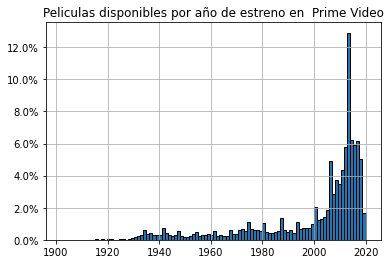

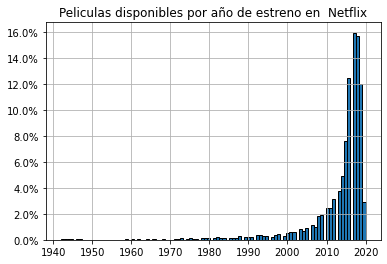

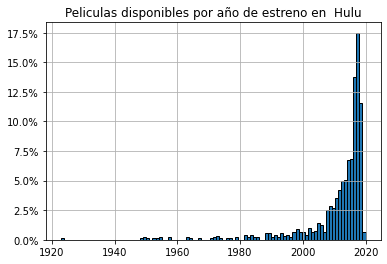

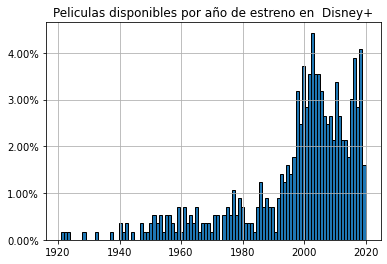

<Figure size 432x288 with 0 Axes>

In [20]:
Aux_RT = Prime['Year'].loc[Prime['Year'] > 0] 
Name   = 'Prime Video'
Title  = 'Peliculas disponibles por año de estreno en  ' + Name 
plt.title(Title)
plt.hist(Aux_RT, bins=100, alpha=1, edgecolor = 'black',  linewidth=1, weights=np.ones(len(Aux_RT)) / len(Aux_RT))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.grid(True)
plt.show()
plt.clf()
print()

Aux_RT = Netflix['Year'].loc[Netflix['Year'] > 0] 
Name   = 'Netflix'
Title  = 'Peliculas disponibles por año de estreno en  ' + Name 
plt.title(Title)
plt.hist(Aux_RT, bins=100, alpha=1, edgecolor = 'black',  linewidth=1, weights=np.ones(len(Aux_RT)) / len(Aux_RT))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.grid(True)
plt.show()
plt.clf()
print()

Aux_RT = Hulu['Year'].loc[Hulu['Year'] > 0] 
Name   = 'Hulu'
Title  = 'Peliculas disponibles por año de estreno en  ' + Name 
plt.title(Title)
plt.hist(Aux_RT, bins=100, alpha=1, edgecolor = 'black',  linewidth=1, weights=np.ones(len(Aux_RT)) / len(Aux_RT))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.grid(True)
plt.show()
plt.clf()
print()


Aux_RT = Disney['Year'].loc[Disney['Year'] > 0] 
Name   = 'Disney+'
Title  = 'Peliculas disponibles por año de estreno en  ' + Name 
plt.title(Title)
plt.hist(Aux_RT, bins=100, alpha=1, edgecolor = 'black',  linewidth=1, weights=np.ones(len(Aux_RT)) / len(Aux_RT))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.grid(True)
plt.show()
plt.clf()

Como era de esperar, Hulu posee la mayor parte de su cartelera con estrenos. Aunque Disney si fue una sorpresa, teniendo la mayoría de sus peliculas entre los años 2000 y finales de los 90s. Aunque de momento Prime Video es el que domina la escena siendo el que tiene más videos y una cantidad importante de estrenos. Netflix por su parte al igual que Hulu mantiene una cartelera mayoritariamente de estrenos

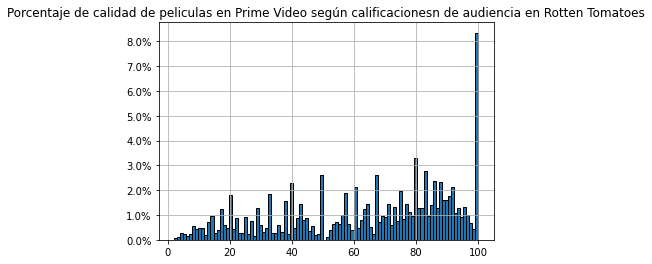

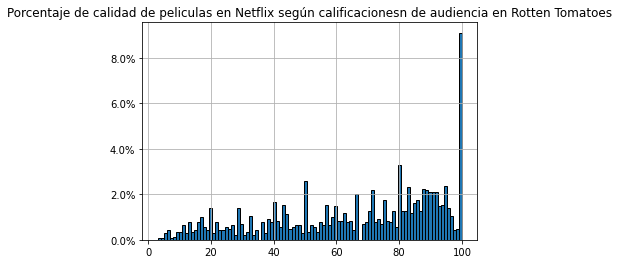

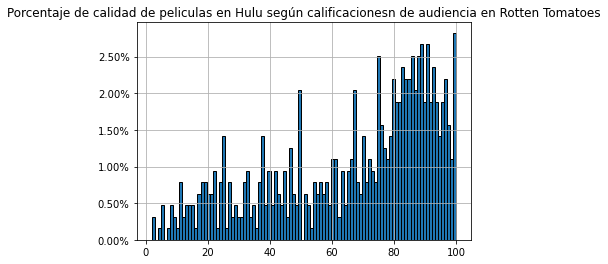

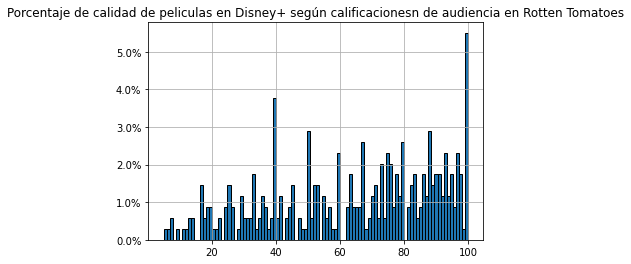

<Figure size 432x288 with 0 Axes>

In [21]:
Aux_RT = Prime['Rotten Tomatoes'].loc[Prime['Rotten Tomatoes'] > 0] 
Name   = 'Prime Video'
Title  = 'Porcentaje de calidad de peliculas en ' + Name + ' según calificacionesn de audiencia en Rotten Tomatoes'
plt.title(Title)
plt.hist(Aux_RT, bins=100, alpha=1, edgecolor = 'black',  linewidth=1, weights=np.ones(len(Aux_RT)) / len(Aux_RT))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.grid(True)
plt.show()
plt.clf()
print()

Aux_RT = Netflix['Rotten Tomatoes'].loc[Netflix['Rotten Tomatoes'] > 0] 
Name   = 'Netflix'
Title  = 'Porcentaje de calidad de peliculas en ' + Name + ' según calificacionesn de audiencia en Rotten Tomatoes'
plt.title(Title)
plt.hist(Aux_RT, bins=100, alpha=1, edgecolor = 'black',  linewidth=1, weights=np.ones(len(Aux_RT)) / len(Aux_RT))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.grid(True)
plt.show()
plt.clf()
print()

Aux_RT = Hulu['Rotten Tomatoes'].loc[Hulu['Rotten Tomatoes'] > 0] 
Name   = 'Hulu'
Title  = 'Porcentaje de calidad de peliculas en ' + Name + ' según calificacionesn de audiencia en Rotten Tomatoes'
plt.title(Title)
plt.hist(Aux_RT, bins=100, alpha=1, edgecolor = 'black',  linewidth=1, weights=np.ones(len(Aux_RT)) / len(Aux_RT))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.grid(True)
plt.show()
plt.clf()
print()


Aux_RT = Disney['Rotten Tomatoes'].loc[Disney['Rotten Tomatoes'] > 0] 
Name   = 'Disney+'
Title  = 'Porcentaje de calidad de peliculas en ' + Name + ' según calificacionesn de audiencia en Rotten Tomatoes'
plt.title(Title)
plt.hist(Aux_RT, bins=100, alpha=1, edgecolor = 'black',  linewidth=1, weights=np.ones(len(Aux_RT)) / len(Aux_RT))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.grid(True)
plt.show()
plt.clf()
print()

En lo que respecta a calidad según audiencia, Hulu y Disney son los que se quedan atras, este último teniendo dos porcentajes predominantes en 100% y 40% (o es buena o es muy mala). Netflix y Prime poseen una cartelera un poco más estable, siendo Prime el que presenta mejores reseñas.

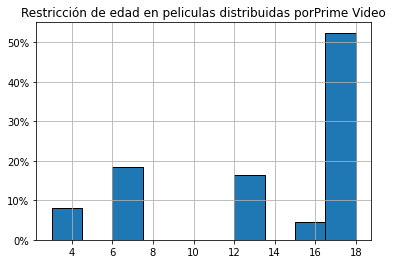

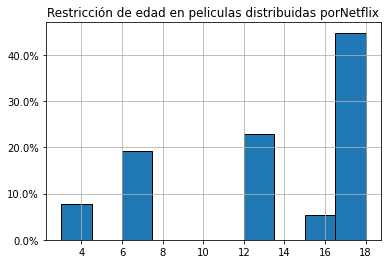

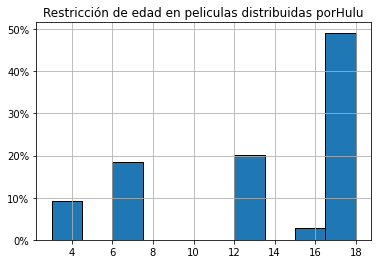

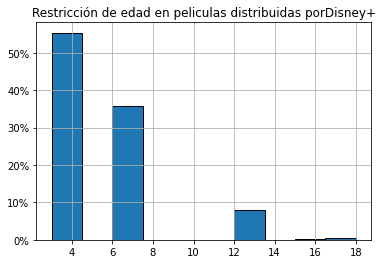

<Figure size 432x288 with 0 Axes>

In [22]:
Aux_RT = Prime['Age'].loc[Prime['Age'] > 0] 
Name   = 'Prime Video'
Title  = 'Restricción de edad en peliculas distribuidas por' + Name
plt.title(Title)
plt.hist(Aux_RT, bins=10, alpha=1, edgecolor = 'black',  linewidth=1, weights=np.ones(len(Aux_RT)) / len(Aux_RT))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.grid(True)
plt.show()
plt.clf()
print()

Aux_RT = Netflix['Age'].loc[Netflix['Age'] > 0] 
Name   = 'Netflix'
Title  = 'Restricción de edad en peliculas distribuidas por' + Name
plt.title(Title)
plt.hist(Aux_RT, bins=10, alpha=1, edgecolor = 'black',  linewidth=1, weights=np.ones(len(Aux_RT)) / len(Aux_RT))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.grid(True)
plt.show()
plt.clf()
print()

Aux_RT = Hulu['Age'].loc[Hulu['Age'] > 0] 
Name   = 'Hulu'
Title  = 'Restricción de edad en peliculas distribuidas por' + Name
plt.title(Title)
plt.hist(Aux_RT, bins=10, alpha=1, edgecolor = 'black',  linewidth=1, weights=np.ones(len(Aux_RT)) / len(Aux_RT))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.grid(True)
plt.show()
plt.clf()
print()


Aux_RT = Disney['Age'].loc[Disney['Age'] > 0] 
Name   = 'Disney+'
Title  = 'Restricción de edad en peliculas distribuidas por' + Name
plt.title(Title)
plt.hist(Aux_RT, bins=10, alpha=1, edgecolor = 'black',  linewidth=1, weights=np.ones(len(Aux_RT)) / len(Aux_RT))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.grid(True)
plt.show()
plt.clf()
print()

Para  el caso de la restricción de edad, como era de esperar Disney+ está dirigido a niños, mientras que Netflix esta más orientado a adolecentes y Hulu y Prime optan por audiencias más maduras

División de películas por generos en Prime Videos


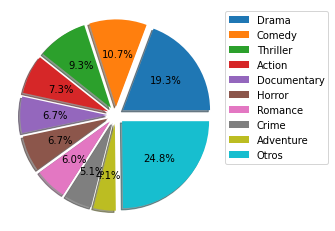

División de películas por generos en Netflix


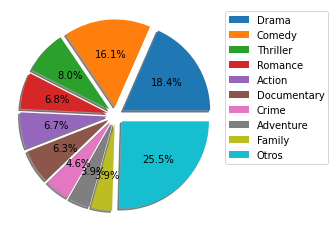

División de películas por generos en Hulu


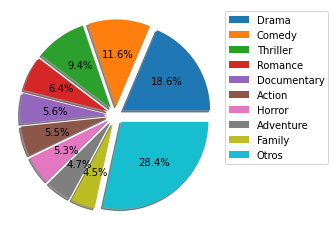

División de películas por generos en Disney+


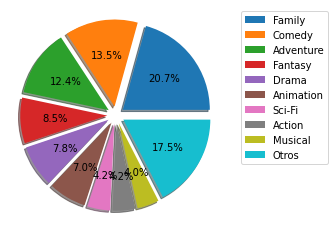

In [23]:
def Plot_Gen(data, Name):
    Gen   = pd.DataFrame()
    Count = []
    for n in Columns_Genres:
        Count.append(len(data.loc[data[n] == 1]))

    Gen['Labels'] = Columns_Genres
    Gen['Count']  = Count
    Gen = Gen.sort_values(by=['Count'], ascending=False)

    x = []
    y = []
    x = list(Gen['Count'][:9])
    y = list(Gen['Labels'][:9])

    x.append(Gen['Count'][9:].sum())
    y.append('Otros')

    print("División de películas por generos en", Name)
    explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
    plt.pie(x, shadow=True, autopct='%1.1f%%', explode=explode)
    plt.legend(labels=y,bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()
    
#Plot prime videos distribución por género
Name  = 'Prime Videos' 
Plot_Gen(Prime, Name)

#Plot Netflix videos distribución por género
Name  = 'Netflix' 
Plot_Gen(Netflix, Name)

#Plot Hulu videos distribución por género
Name  = 'Hulu' 
Plot_Gen(Hulu, Name)

#Plot Disney videos distribución por género
Name  = 'Disney+' 
Plot_Gen(Disney, Name)

División de películas por idiomas en Prime Videos


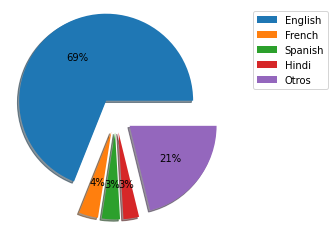

División de películas por idiomas en Netflix


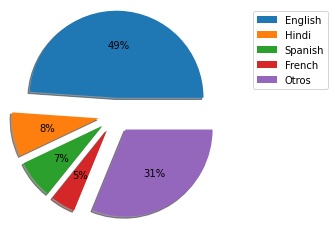

División de películas por idiomas en Hulu


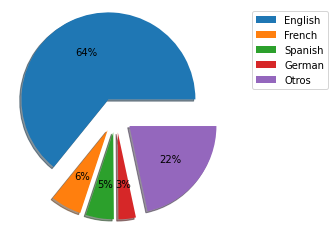

División de películas por idiomas en Disney+


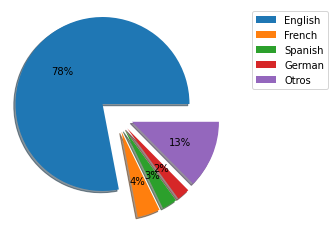

In [24]:
def Plot_Gen(data, Name):
    Gen   = pd.DataFrame()
    Count = []
    for n in Columns_Language:
        Count.append(len(data.loc[data[n] == 1]))

    Gen['Labels'] = Columns_Language
    Gen['Count']  = Count
    Gen = Gen.sort_values(by=['Count'], ascending=False)

    x = []
    y = []
    x = list(Gen['Count'][:4])
    y = list(Gen['Labels'][:4])

    x.append(Gen['Count'][4:].sum())
    y.append('Otros')

    print("División de películas por idiomas en", Name)
    explode = (0.2, 0.2, 0.2, 0.2, 0.2)
    plt.pie(x, shadow=True, autopct='%1.0f%%', explode=explode)
    plt.legend(labels=y,bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()
    
#Plot prime videos distribución por género
Name  = 'Prime Videos' 
Plot_Gen(Prime, Name)

#Plot Netflix videos distribución por género
Name  = 'Netflix' 
Plot_Gen(Netflix, Name)

#Plot Hulu videos distribución por género
Name  = 'Hulu' 
Plot_Gen(Hulu, Name)

#Plot Disney videos distribución por género
Name  = 'Disney+' 
Plot_Gen(Disney, Name)

División de películas por paíces de grabación en Prime Videos


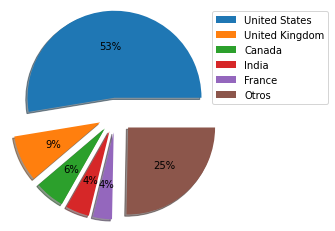

División de películas por paíces de grabación en Netflix


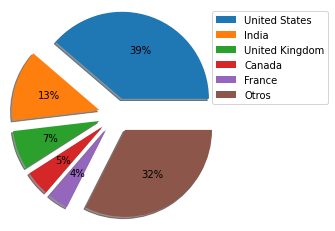

División de películas por paíces de grabación en Hulu


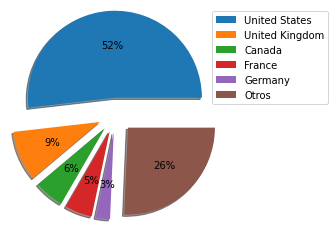

División de películas por paíces de grabación en Disney+


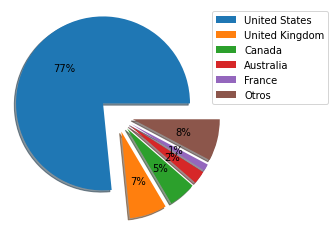

In [25]:
def Plot_Gen(data, Name):
    Gen   = pd.DataFrame()
    Count = []
    for n in Columns_Country:
        Count.append(len(data.loc[data[n] == 1]))

    Gen['Labels'] = Columns_Country
    Gen['Count']  = Count
    Gen = Gen.sort_values(by=['Count'], ascending=False)

    x = []
    y = []
    x = list(Gen['Count'][:5])
    y = list(Gen['Labels'][:5])

    x.append(Gen['Count'][5:].sum())
    y.append('Otros')

    print("División de películas por paíces de grabación en", Name)
    explode = (0.2, 0.2, 0.2, 0.2, 0.2, 0.2)
    plt.pie(x, shadow=True, autopct='%1.0f%%', explode=explode)
    plt.legend(labels=y,bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()
    
#Plot prime videos distribución por género
Name  = 'Prime Videos' 
Plot_Gen(Prime, Name)

#Plot Netflix videos distribución por género
Name  = 'Netflix' 
Plot_Gen(Netflix, Name)

#Plot Hulu videos distribución por género
Name  = 'Hulu' 
Plot_Gen(Hulu, Name)

#Plot Disney videos distribución por género
Name  = 'Disney+' 
Plot_Gen(Disney, Name)

En general de estas graficas podemos ver algo importante con respecto a Netflix, el cual es el que esta claramente apostando por el mercado Hindi, teniendo mayor peliculas en este idioma y producidas en este pais.

Otro aspecto notable es que en todos los servicions el genero de Drama es el más importante, a excepción de Disney+ en el cual el genero familiar es el dominante

# Conclusiones

Como se aprecia el set de datos es a simple vista sencillo. Pero debido a la cantidad de información y diferentes características (Género, País e Idioma) se puede tornar pesado de analizar sin el debido pre-procesado.

Del el análisis podemos obtener:

* Prime videos es la mejor opción si se esta buscando películas de acción y con un contenido más "maduro". Además de ser la que claramente trae el catálogo más grande. Esto es una sorpresa debido a la popularidad de Netflix. 

* Como segundo punto tenemos la popularidad de Netflix, como se ve en los graficos esta compañia esta apostando por mercados emergentes (como el de la India) y también a un demografico "Juvenil" siendo estas dos razones las que le dan mayor propaganda a nivel mediatico.

* Disney+ tiene resultados muy esperados, teniendo un catalogo viejo, apelando a nostalgia y a un demografico más familiar.

* Hulu es tal vez el menos relevante, teniendo un catálogo "maduro" pero no llegando a ser una competencia para Prime y sin tener el apoyo mediatico de Netflix.

Para el experimento de sustitución se cocluye que para el remplazo de datos en la columna "Rotten Tomatoes" es mejor usar la media de los valores obtenidos en peliculas similares (que comparten genero, plataforma de streaming e idioma) en comparación con dejar el valor en 0 o usar la mediana